<img src="https://rhyme.com/assets/img/logo-dark.png" align=center></img>
<h2 align="center">Predict Employee Churn with Decision Trees and Random Forests</h2>

## Binary classification Problem

### Task 1: Import Libraries
---

In [1]:
from __future__ import print_function
%matplotlib inline
import os
import warnings
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
import pandas as pd
import pandas_profiling as ProfileReport
plt.style.use("ggplot")
warnings.simplefilter("ignore")

In [2]:
plt.rcParams['figure.figsize'] = (12,8)

### Task 2: Exploratory Data Analysis
---

In [3]:
hr=pd.read_csv("employee_data.csv")

In [4]:
from pandas_profiling import ProfileReport
prof = ProfileReport(hr)
prof.to_file('output.html')

In [5]:
prof

Number of variables,10
Number of observations,14999
Total Missing (%),0.0%
Total size in memory,1.1 MiB
Average record size in memory,80.0 B
Numeric,5
Categorical,2
Boolean,3
Date,0
Text (Unique),0
Rejected,0


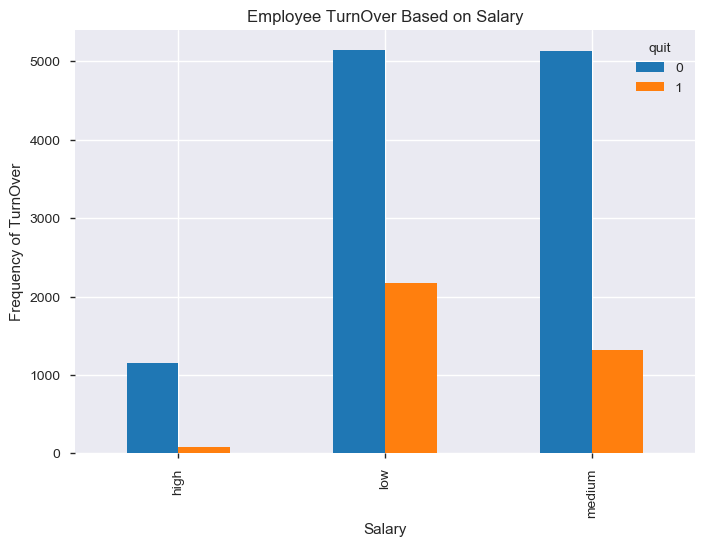

In [6]:
pd.crosstab(hr.salary,hr.quit).plot(kind='bar')
plt.title("Employee TurnOver Based on Salary")
plt.xlabel("Salary")
plt.ylabel("Frequency of TurnOver")
plt.show()

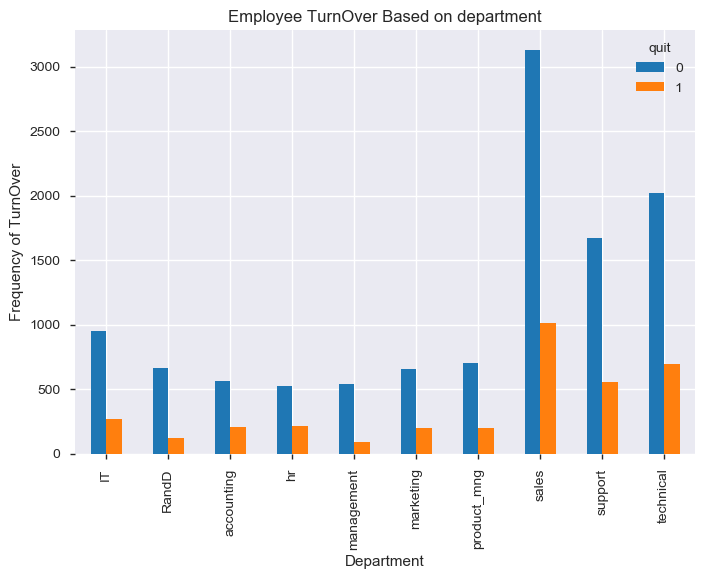

In [7]:
pd.crosstab(hr.department,hr.quit).plot(kind='bar')
plt.title("Employee TurnOver Based on department")
plt.xlabel("Department")
plt.ylabel("Frequency of TurnOver")
plt.show()

### Task 3: Encode Categorical Features
---

In [8]:
cat_vars=['department','salary']
for var in cat_vars:
    cat_list=pd.get_dummies(hr[var],prefix=var)
    hr=hr.join(cat_list)

In [9]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0


In [10]:
hr.drop(columns=['department','salary'],axis=1,inplace=True)

In [11]:
hr.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department_IT,department_RandD,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
14994,0.40,0.57,2,151,3,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
14998,0.37,0.52,2,158,3,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0


### Task 4: Visualize Class Imbalance
---

In [12]:
from yellowbrick.target import ClassBalance
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12,8)

## class Imbalance Problem

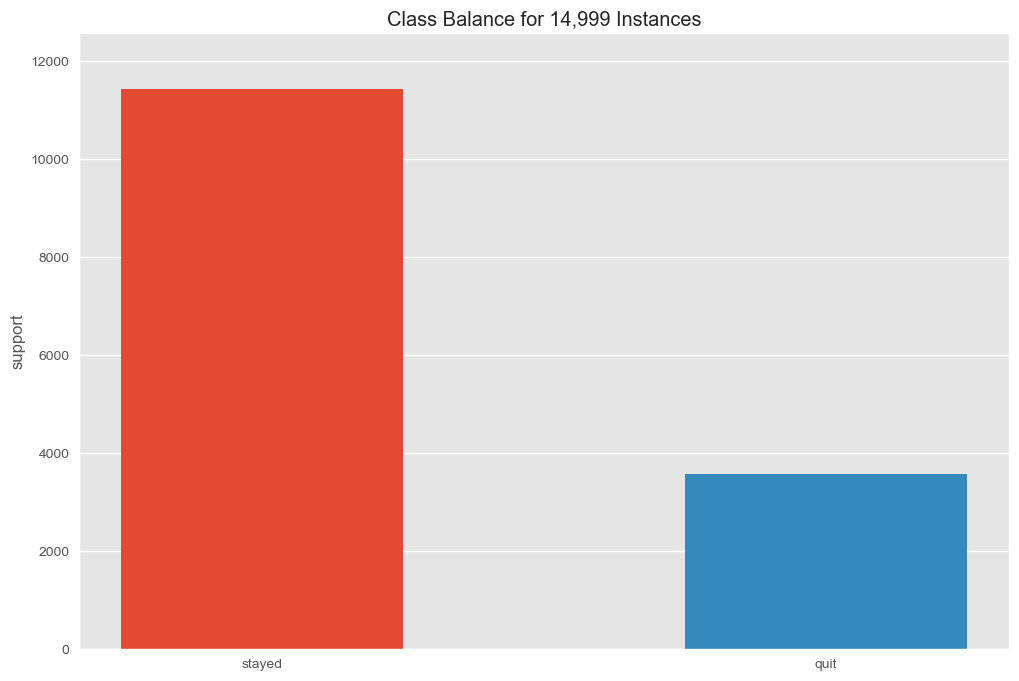

In [13]:
visualizer = ClassBalance (labels=['stayed','quit']).fit(hr.quit)
visualizer.show()

### Task 5: Create Training and Test Sets
---

In [14]:
# feature Matrix
X=hr.loc[:,hr.columns !='quit']
#Target Vector
y=hr.quit

#### This stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.

In [15]:
from sklearn.model_selection import train_test_split
X_train , X_test,y_train,y_test = train_test_split (X,y,random_state=0,test_size=0.2,stratify=y)

### Task 6 & 7: Build an Interactive Decision Tree Classifier
---

Supervised learning: 
- The inputs are random variables $X = X_1, ..., X_p$;
- The output is a random variable $Y.$

- Data is a finite set $$\mathbb{L}=\{(x_i,y_i)|i=0, ..., N-1\}$$
where $x_i \in X = X_1 \times ... \times X_p$ and $y_i \in y$ are randomly drawn from $P_{X,Y}.$

E.g., $(x_i,y_i)=((\text{salary = low, department = sales, ...}),\text{quit = 1})$

- The goal is to find a model $\varphi_\mathbb{L}: X \mapsto y$ minimizing $$\text{Err}(\varphi_\mathbb{L}) = \mathbb{E}_{X,Y}\{L(Y, \varphi_\mathbb{L}(X))\}.$$

About:
 
 - Decision trees are non-parametric models which can model arbitrarily complex relations between inputs and outputs, without any a priori assumption
 
- Decision trees handle numeric and categorical variables

- They implement feature selection, making them robust to noisy features (to an extent)

- Robust to outliers or errors in labels

- Easily interpretable by even non-ML practioners.

#### Decision trees: partitioning the feature space:

![partition](assets/images/partition-feature-space.png)

- Decision trees generally have low bias but have high variance.
- We will solve the high variance problem in Task 8.

### Def: Gini Impurity tells us what is the probability of misclassifying an observation.
##### Note that the lower the Gini the better the split. In other words the lower the likelihood of misclassification.


2.2.7 Decision tree classifier
Decision tree classifiers are utilized as a well known classification technique in different pattern recognition issues, for example, image classification and character recognition (Safavian & Landgrebe, 1991). Decision tree classifiers perform more successfully, specifically for complex classification problems, due to their high adaptability and computationally effective features. Besides, decision tree classifiers exceed expectations over numerous typical supervised classification methods (Friedl & Brodley, 1997).

In particular, no distribution assumption is needed by decision tree classifiers regarding the input data. This particular feature gives to the Decision Tree Classifiers a higher adaptability to deal with different datasets, whether numeric or categorical, even with missing data. Also, decision tree classifiers are basically nonparametric. Also, decision trees are ideal for dealing with nonlinear relations among features and classes. At long last, the classification procedure through a tree-like structure is constantly natural and interpretable.

Generally, a decision tree comprises of three basic segments including a root node, a few hidden nodes, and a lot of terminal nodes (known as leaves). An illustrative case of a decision tree structure is depicted in Fig. 2.21. As demonstrated, for each hidden and terminal node (known as child node), there should exist a parent node demonstrating the data source. In the interim, with respect to the root node and each hidden node (known as parent hub), at least two child nodes will be created from these parent nodes dependent on different decision rules.
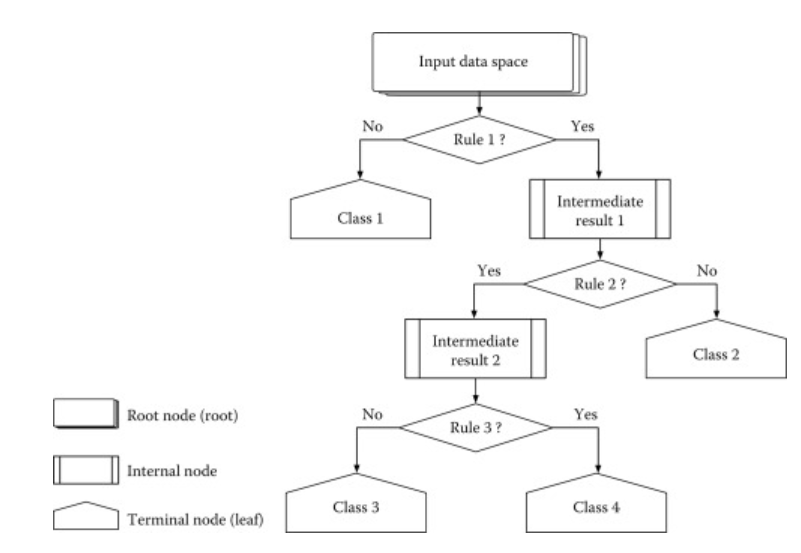
Fig. 2.21
Sign in to download full-size image
Fig. 2.21. Decision tree architecture (binary tree) (Chang &amp; Bai, 2018).

In the event that each parent hub is part into two descendants, the decision tree is frequently known as a binary tree (e.g., Fig. 2.21, and the inherent decision rule can be communicated as a dyadic Boolean operator with the end goal that the data points focuses are split based on condition rules satisfaction. Among these three sorts of nodes, the root node includes the dataspace, while the other two sorts of nodes relate to divided subspaces. Instead of root and hidden nodes, the terminal hubs such as leaves, allude to the final decided outputs of the entire decision making procedure, which can’t be additionally parceled; comparing class names will at that point be allotted. When constructing a decision tree, the most basic step is to part each internal node and the root node with different decision rules or learning models.

In [16]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz # display the tree within a Jupyter notebook
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from ipywidgets import interactive, IntSlider, FloatSlider, interact
import ipywidgets
from IPython.display import Image
from subprocess import call
import matplotlib.image as mpimg

### min_split is the minimum no of samples.
### min_leaf is the minimum no of samples required to  added to leaf node.

In [17]:
hr.tail(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department_IT,department_RandD,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
14996,0.37,0.53,2,143,3,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
14998,0.37,0.52,2,158,3,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [18]:
X_train.columns.values

array(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'department_IT', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng',
       'department_sales', 'department_support', 'department_technical',
       'salary_high', 'salary_low', 'salary_medium'], dtype=object)

In [19]:
@interact
def plot_tree(crit=['gini','entropy'],
              split=['best','random'],
              depth=IntSlider(min=1.0,max=30.0,value=2.0, continuous_update=False),
              min_split=IntSlider(min=2.0,max=5.0,value=2.0, continuous_update=False),
              min_leaf=IntSlider(min=1.0,max=5.0,value=1.0, continuous_update=False)):
    estimator = DecisionTreeClassifier(random_state=0,
                                    criterion = crit,
                                    splitter = split,
                                    max_depth = depth,
                                    min_samples_leaf = min_leaf,
                                    min_samples_split = min_split
                                    )
    estimator.fit(X_train,y_train)
    print('Decision Tree Training Accuracy: {:.3f}'.format(accuracy_score(y_train,estimator.predict(X_train)
                                                                         )))
    print('Decision Tree Test Accuracy: {:.3f}'.format(accuracy_score(y_test,estimator.predict(X_test)
                                                                  )))
    graph = Source(tree.export_graphviz(estimator,out_file=None,
                                       feature_names=X_train.columns,
                                       class_names=['Stayed','quit'],
                                       filled=True))
    display(Image(data=graph.pipe(format='png')))
    return estimator

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

### Task 8: Build an Interactive Random Forest Classifier
---

Although randomization increases bias, it is possible to get a reduction in variance of the ensemble. Random forests are one of the most robust machine learning algorithms for a variety of problems.

- Randomization and averaging lead to a reduction in variance and improve accuracy
- The implementations are parallelizable
- Memory consumption and training time can be reduced by bootstrapping
- Sampling features and not solely sampling examples is crucial to improving accuracy

In [20]:
@interact
def plot_tree_rf(crit=['gini','entropy'],
                 bootstrap=['True','False'],
                 depth=IntSlider(min=1,max=30,value=3, continuous_update=False),
                 forests=IntSlider(min=1,max=500,value=100,continuous_update=False),
                 min_split=IntSlider(min=2,max=5,value=2, continuous_update=False),
                 min_leaf=IntSlider(min=1,max=5,value=1, continuous_update=False)):
    estimator=RandomForestClassifier(random_state=1,
                                    criterion=crit,
                                    bootstrap = bootstrap , 
                                    n_estimators=forests,
                                    max_depth=depth,
                                    min_samples_split=min_split,
                                    min_samples_leaf=min_leaf,
                                    n_jobs=-1,
                                    verbose=False)
    estimator.fit(X_train,y_train)
    print('Random Forest Training Accuracy: {:.3f}'.format(accuracy_score(y_train,estimator.predict(X_train))))
    print('Random Forest Test Accuracy: {:.3f}'.format(accuracy_score(y_test,estimator.predict(X_test))))
    num_tree=estimator.estimators_[0]
    print("Visualizing Tree:",0)
    graph = Source(tree.export_graphviz(num_tree,out_file=None,
                                       feature_names=X_train.columns,
                                       class_names=['Stayed','quit'],
                                       filled=True))
    display(Image(data=graph.pipe(format='png')))    
    return estimator

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

### Task 9: Feature Importance and Evaluation Metrics
---

In [21]:
from yellowbrick.model_selection import FeatureImportances
plt.rcParams['figure.figsize'] = (12,8)
plt.style.use("ggplot")

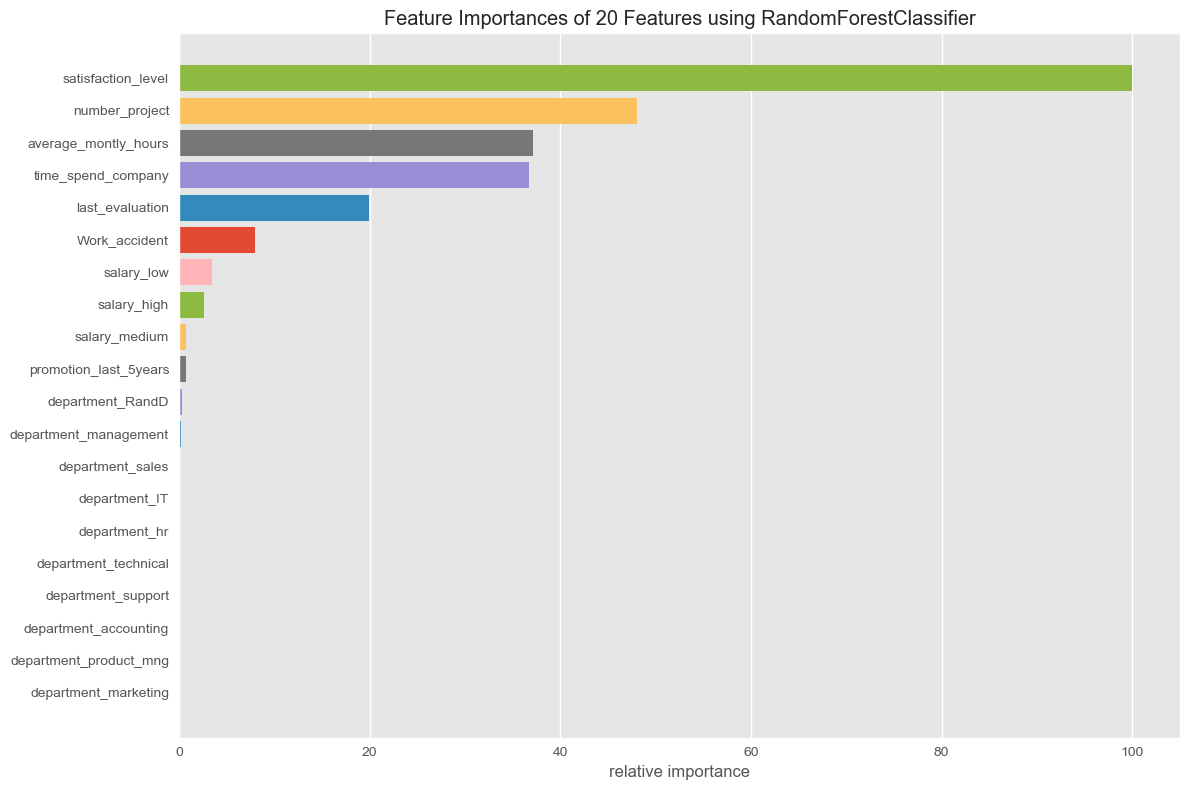

In [22]:
rf=RandomForestClassifier(bootstrap='True', class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=1, verbose=False,
            warm_start=False)
viz=FeatureImportances(rf)
viz.fit(X_train,y_train)
viz.show();

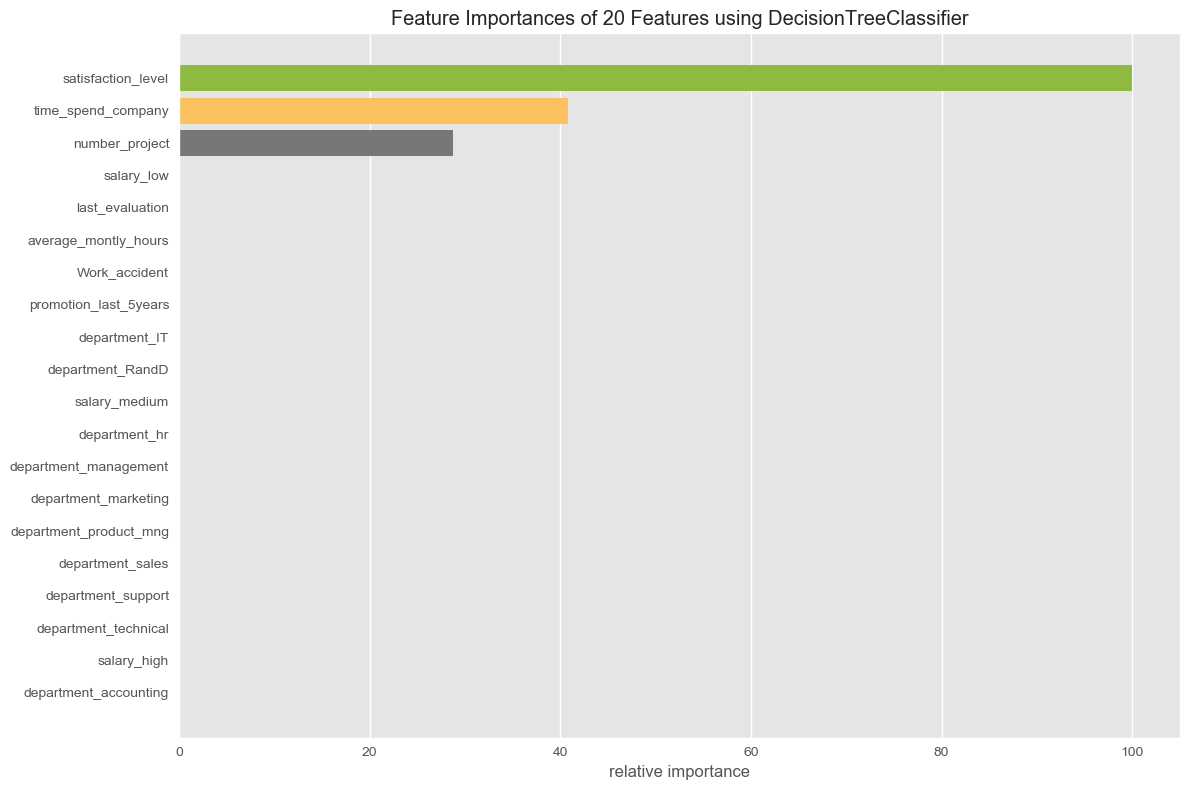

In [23]:
dt=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')
viz=FeatureImportances(dt)
viz.fit(X_train,y_train)
viz.show();

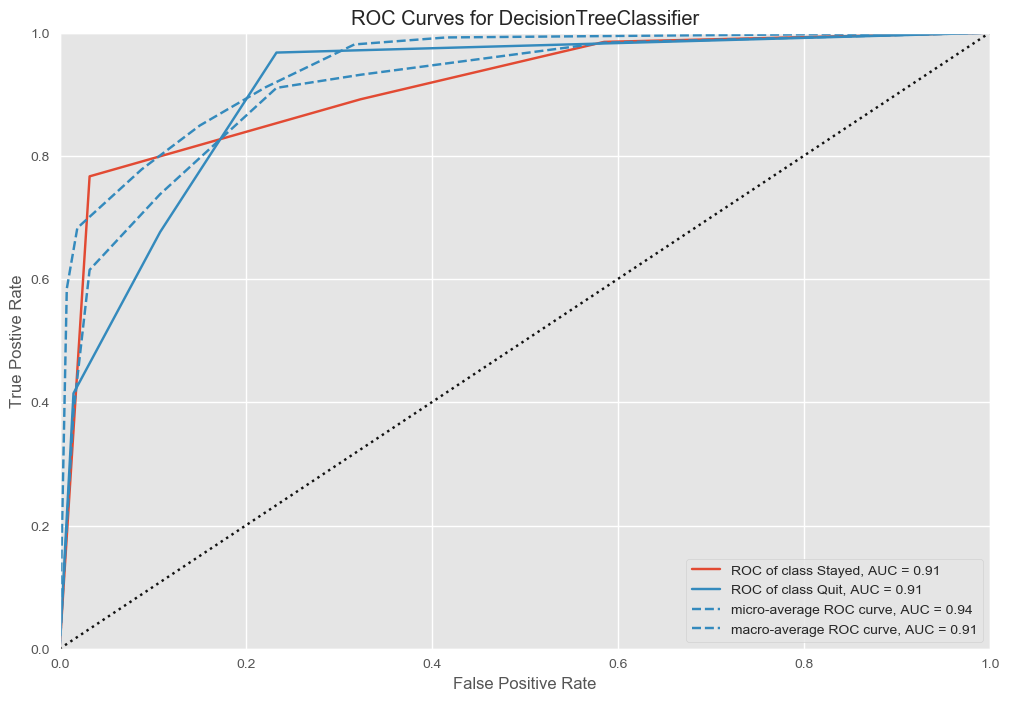

In [24]:
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(dt,classes=['Stayed','Quit'])
visualizer.fit(X_train,y_train)
visualizer.score(X_test,y_test)
visualizer.poof();

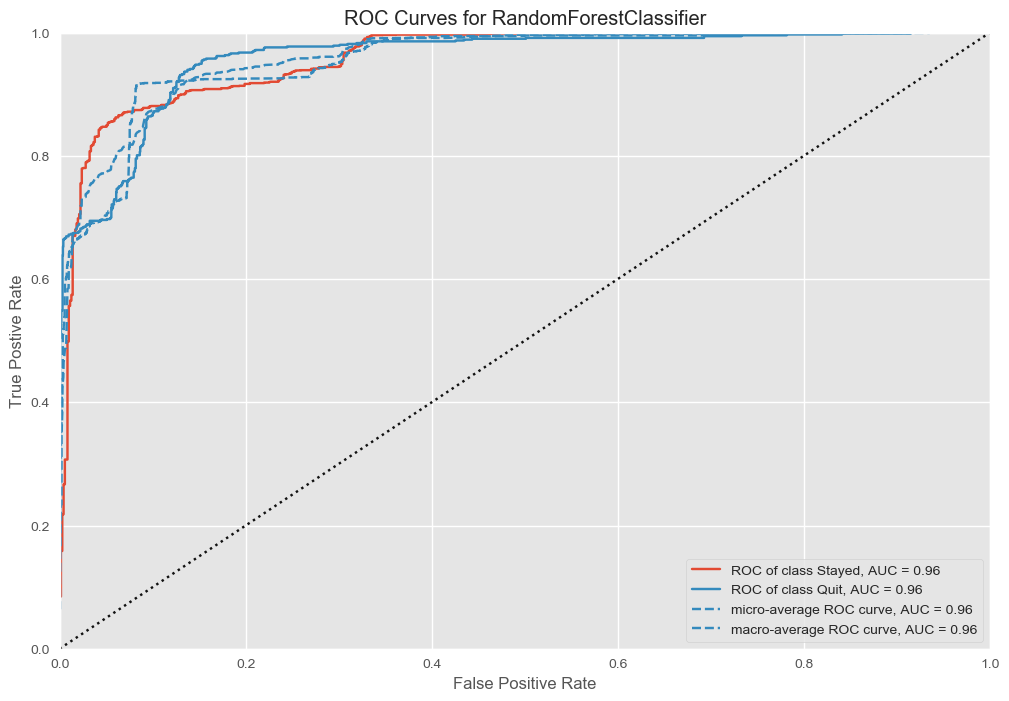

In [25]:
visualizer = ROCAUC(rf,classes=['Stayed','Quit'])
visualizer.fit(X_train,y_train)
visualizer.score(X_test,y_test)
visualizer.poof();